# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [41]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [42]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

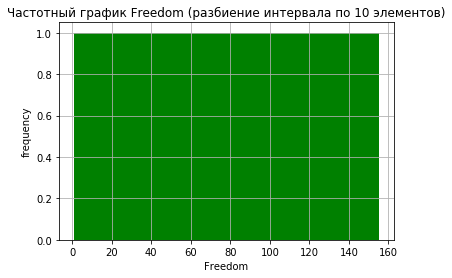

In [5]:
n, bins, patches = plt.hist(df['Freedom'], 155, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

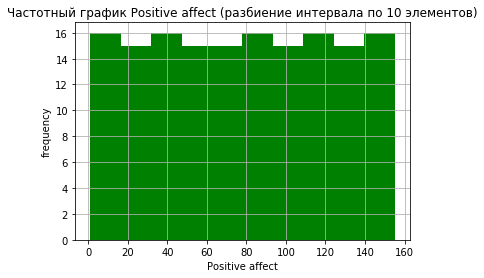

In [6]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

**Вывод:** оба графика имеют равномерное распределение. Это и не удивительно, каждый элемен в совокупности встречается один раз, так как это ранг.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [31]:
# Очищаем 'Freedom' от NaN
clear_freedom = [i for i in df['Freedom'] if not np.isnan(i)]

In [8]:
# Ищем различные величины
print('Медиана:', statistics.median(clear_freedom))

try: 
    print('Мода:', statistics.mode(clear_freedom))
except: 
    print('Мода отсутствует.')

print('Математическое ождание (среднее):', statistics.mean(clear_freedom))

print('Стандартное отклонение:', statistics.pstdev(clear_freedom))

print('Дисперсия:', statistics.pvariance(clear_freedom))

print('Минимум:', min(clear_freedom))

print('Максимум:', max(clear_freedom))

print('Количество выбросов:', len(df['Freedom']) - len(clear_freedom))

print('Размах:', max(clear_freedom) - min(clear_freedom))

Медиана: 78.0
Мода отсутствует.
Математическое ождание (среднее): 78.0
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Минимум: 1.0
Максимум: 155.0
Количество выбросов: 1
Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [33]:
# Очищаем 'Freedom' и 'Positive affect' от NaN
df_clear_2column = df[['Positive affect', 'Freedom']].dropna()

Коэффициент корреляции Пирсона: 0.6817698430601656


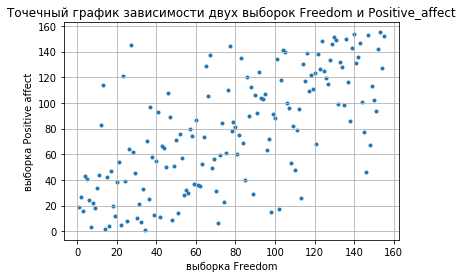

In [34]:
from scipy.stats import pearsonr
x = df_clear_2column['Freedom']
y = df_clear_2column['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive_affect')
plt.grid(True)

print('Коэффициент корреляции Пирсона:', corr)

**Вывод:** имеет место положительная корреляция, т.е взаимосвязь прямая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [123]:
# центрирование данных, используем уже очищенные данные
centre_data = [i - statistics.mean(clear_freedom) for i in clear_freedom]
centre_data[:5]

[-73.0, -72.0, -75.0, -71.0, -59.0]

In [121]:
# масштабирование данных, используем уже очищенные данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

scale_data = min_max_scaler.fit_transform(np.array(centre_data).reshape(-1, 1))
scale_data[:5]

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377]])

Построить матрицу корреляций для всех колонок таблицы

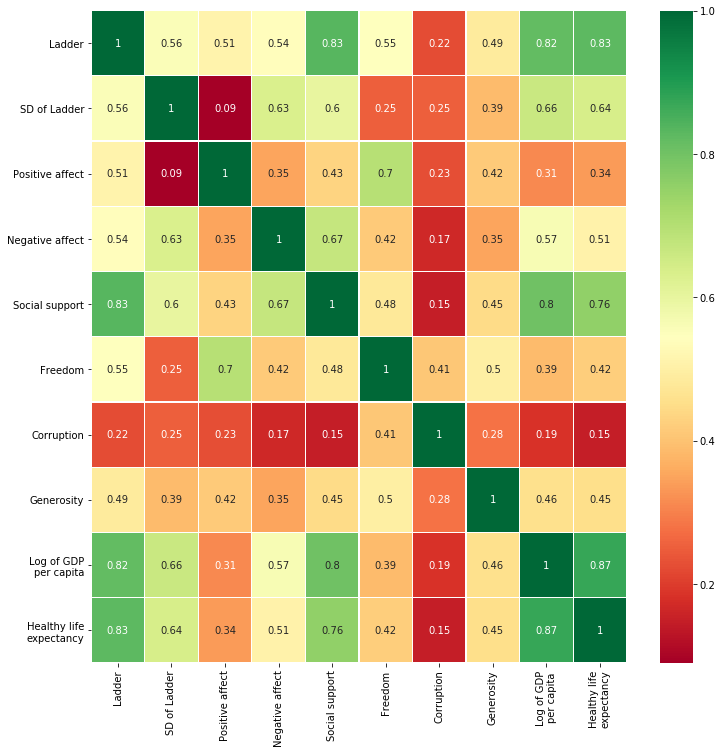

In [59]:
clear_df = df.dropna() #очистка всей таблицы от NaN

import seaborn as sns
sns.heatmap(clear_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

Загрузить следующую таблицу: 

In [44]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_avocado = pd.read_csv(url)
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

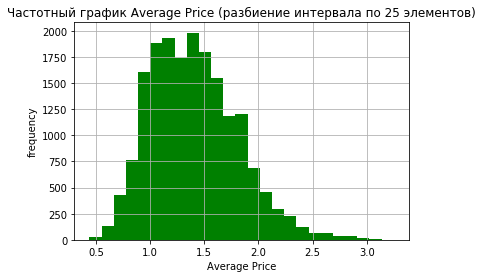

In [53]:
n, bins, patches = plt.hist(df_avocado['AveragePrice'], 25, facecolor='g')

plt.xlabel('Average Price')
plt.ylabel('frequency')
plt.title('Частотный график Average Price (разбиение интервала по 25 элементов)')
plt.grid(True)
plt.show()

**Вывод:** график имеет форму близкую к нормальному распределению

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [55]:
# Очищаем '4046' и 'AveragePrice' от NaN
df_avocado_2column = df_avocado[['AveragePrice', '4046']].dropna()

In [57]:
x = df_avocado_2column['AveragePrice']
y = df_avocado_2column['4046']

corr1, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr1)

Коэффициент корреляции Пирсона: -0.20831704848788477


In [77]:
# Посмотрим корреляцию всех сортов авакадо на среднюю цену
df_avocado_5column = df_avocado[['AveragePrice', '4046', '4225', '4770', 'Total Volume']].dropna()

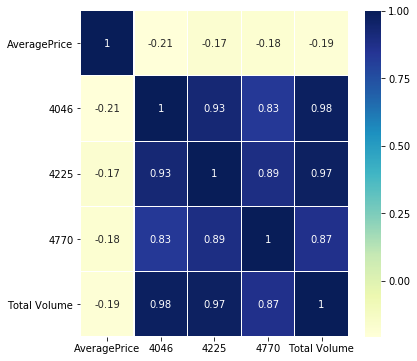

In [78]:
sns.heatmap(df_avocado_5column.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

**Вывод:** количество проданных авакадо каждого вида сильно коррелируют между собой и с общим объмом, т.е. нет замещения продаж одного вида авакадо дрогим при росте продаж одного из них. При этом имеется обратная зависимость со средней ценой, т.е. чем ниже была средняя цена, тем больше было продано авакадо любого из видов (везде схожие значения коэффициентов корреляции).